In [1]:
# instalacja pakietu pyspark

!pip install pyspark==3.0.1 py4j==0.10.9

     |████████████████████████████████| 204.2 MB 33 kB/s 
     |████████████████████████████████| 198 kB 18.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612246 sha256=33b4689bbfb9c0ea2c9a1bb34e4e51f9ab826286dc8962f40063951b4bb8e0ed
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

# utworzenie sesji
spark = SparkSession\
        .builder\
        .master('local[4]')\
        .appName('zadanie_4')\
        .getOrCreate()

In [30]:
csv_file = r"/content/IHME_DAH_DATABASE_1990_2020_Y2021M09D22.CSV"

# pobranie danych z pliku CSV
data = spark.read.csv(csv_file, header=True)

In [31]:
# wyświetlenie 5 wierszy danych
data.show(5)

+----+---------+-------+-----------------+-----------------+---------------+-------------+--------------+--------------------+-------------+------------------+------------------+-------+----------+------+-------------+-------------+--------------------+------------------+----------------+--------------+--------------+----------------+--------------------+------------------+----------------+---------------+----------------+----------------+-------------+--------------+---------------+--------------------+------------------+--------------+---------------+--------------------+------------------+-------------------+------------------+------------------+----------------+-------------------+----------------+--------------+---------------+---------------+--------------+-------------------+-----------------+-------------+--------------------+------------------+--------------+---------------+----------------+----------------+--------------+--------------------+------------------+---------------

In [32]:
# wyświetlenie schematu danych
data.printSchema()

root
 |-- year: string (nullable = true)
 |-- source: string (nullable = true)
 |-- channel: string (nullable = true)
 |-- recipient_isocode: string (nullable = true)
 |-- recipient_country: string (nullable = true)
 |-- gbd_location_id: string (nullable = true)
 |-- wb_regioncode: string (nullable = true)
 |-- wb_location_id: string (nullable = true)
 |-- gbd_region: string (nullable = true)
 |-- gbd_region_id: string (nullable = true)
 |-- gbd_superregion: string (nullable = true)
 |-- gbd_superregion_id: string (nullable = true)
 |-- elim_ch: string (nullable = true)
 |-- prelim_est: string (nullable = true)
 |-- dah_20: string (nullable = true)
 |-- rmh_fp_dah_20: string (nullable = true)
 |-- rmh_mh_dah_20: string (nullable = true)
 |-- rmh_hss_other_dah_20: string (nullable = true)
 |-- rmh_hss_hrh_dah_20: string (nullable = true)
 |-- rmh_other_dah_20: string (nullable = true)
 |-- nch_cnn_dah_20: string (nullable = true)
 |-- nch_cnv_dah_20: string (nullable = true)
 |-- nch_ot

In [33]:
from pyspark.sql.types import *

# utworzenie schematu danych
data_schema = [
      StructField('year', IntegerType(), True),
      StructField('source', StringType(), True),
      StructField('channel', StringType(), True),
      StructField('recipient_isocode', StringType(), True),
      StructField('recipient_country', StringType(), True),
      StructField('gbd_location_id', IntegerType(), True),
      StructField('wb_regioncode', StringType(), True),
      StructField('wb_location_id', IntegerType(), True),
      StructField('gbd_region', StringType(), True),
      StructField('gbd_region_id', IntegerType(), True),
      StructField('gbd_superregion', StringType(), True),
      StructField('gbd_superregion_id', IntegerType(), True),
      StructField('elim_ch', IntegerType(), True),
      StructField('prelim_est', IntegerType(), True),
      StructField('dah_20', IntegerType(), True),
      StructField('rmh_fp_dah_20', IntegerType(), True),
      StructField('rmh_mh_dah_20', IntegerType(), True),
      StructField('rmh_hss_other_dah_20', IntegerType(), True),
      StructField('rmh_hss_hrh_dah_20', IntegerType(), True),
      StructField('rmh_other_dah_20', IntegerType(), True),
      StructField('nch_cnn_dah_20', IntegerType(), True),
      StructField('nch_cnv_dah_20', IntegerType(), True),
      StructField('nch_other_dah_20', IntegerType(), True),
      StructField('nch_hss_other_dah_20', IntegerType(), True),
      StructField('nch_hss_hrh_dah_20', IntegerType(), True),
      StructField('hiv_treat_dah_20', IntegerType(), True),
      StructField('hiv_prev_dah_20', IntegerType(), True),
      StructField('hiv_pmtct_dah_20', IntegerType(), True),
      StructField('hiv_other_dah_20', IntegerType(), True),
      StructField('hiv_ct_dah_20', IntegerType(), True),
      StructField('hiv_ovc_dah_20', IntegerType(), True),
      StructField('hiv_care_dah_20', IntegerType(), True),
      StructField('hiv_hss_other_dah_20', IntegerType(), True),
      StructField('hiv_hss_hrh_dah_20', IntegerType(), True),
      StructField('hiv_amr_dah_20', IntegerType(), True),
      StructField('mal_diag_dah_20', IntegerType(), True),
      StructField('mal_hss_other_dah_20', IntegerType(), True),
      StructField('mal_hss_hrh_dah_20', IntegerType(), True),
      StructField('mal_con_nets_dah_20', IntegerType(), True),
      StructField('mal_con_irs_dah_20', IntegerType(), True),
      StructField('mal_con_oth_dah_20', IntegerType(), True),
      StructField('mal_treat_dah_20', IntegerType(), True),
      StructField('mal_comm_con_dah_20', IntegerType(), True),
      StructField('mal_other_dah_20', IntegerType(), True),
      StructField('mal_amr_dah_20', IntegerType(), True),
      StructField('tb_other_dah_20', IntegerType(), True),
      StructField('tb_treat_dah_20', IntegerType(), True),
      StructField('tb_diag_dah_20', IntegerType(), True),
      StructField('tb_hss_other_dah_20', IntegerType(), True),
      StructField('tb_hss_hrh_dah_20', IntegerType(), True),
      StructField('tb_amr_dah_20', IntegerType(), True),
      StructField('oid_hss_other_dah_20', IntegerType(), True),
      StructField('oid_hss_hrh_dah_20', IntegerType(), True),
      StructField('oid_ebz_dah_20', IntegerType(), True),
      StructField('oid_zika_dah_20', IntegerType(), True),
      StructField('oid_covid_dah_20', IntegerType(), True),
      StructField('oid_other_dah_20', IntegerType(), True),
      StructField('oid_amr_dah_20', IntegerType(), True),
      StructField('ncd_hss_other_dah_20', IntegerType(), True),
      StructField('ncd_hss_hrh_dah_20', IntegerType(), True),
      StructField('ncd_tobac_dah_20', IntegerType(), True),
      StructField('ncd_mental_dah_20', IntegerType(), True),
      StructField('ncd_other_dah_20', IntegerType(), True),
      StructField('swap_hss_other_dah_20', IntegerType(), True),
      StructField('swap_hss_hrh_dah_20', IntegerType(), True),
      StructField('swap_hss_pp_dah_20', IntegerType(), True),
      StructField('other_dah_20', IntegerType(), True),
      StructField('rmh_dah_20', IntegerType(), True),
      StructField('nch_dah_20', IntegerType(), True),
      StructField('ncd_dah_20', IntegerType(), True),
      StructField('hiv_dah_20', IntegerType(), True),
      StructField('mal_dah_20', IntegerType(), True),
      StructField('tb_dah_20', IntegerType(), True),
      StructField('swap_hss_total_dah_20', IntegerType(), True),
      StructField('oid_dah_20', IntegerType(), True),
      StructField('unalloc_dah_20', IntegerType(), True),  
]

data_struc = StructType(fields = data_schema)

In [34]:
# dodanie schematu do danych
data2 = spark.read.csv(csv_file, header=True, schema=data_struc)

data2.printSchema()

root
 |-- year: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- channel: string (nullable = true)
 |-- recipient_isocode: string (nullable = true)
 |-- recipient_country: string (nullable = true)
 |-- gbd_location_id: integer (nullable = true)
 |-- wb_regioncode: string (nullable = true)
 |-- wb_location_id: integer (nullable = true)
 |-- gbd_region: string (nullable = true)
 |-- gbd_region_id: integer (nullable = true)
 |-- gbd_superregion: string (nullable = true)
 |-- gbd_superregion_id: integer (nullable = true)
 |-- elim_ch: integer (nullable = true)
 |-- prelim_est: integer (nullable = true)
 |-- dah_20: integer (nullable = true)
 |-- rmh_fp_dah_20: integer (nullable = true)
 |-- rmh_mh_dah_20: integer (nullable = true)
 |-- rmh_hss_other_dah_20: integer (nullable = true)
 |-- rmh_hss_hrh_dah_20: integer (nullable = true)
 |-- rmh_other_dah_20: integer (nullable = true)
 |-- nch_cnn_dah_20: integer (nullable = true)
 |-- nch_cnv_dah_20: integer (nullable = tr

In [35]:
data2.show(5)

+----+---------+-------+-----------------+-----------------+---------------+-------------+--------------+--------------------+-------------+------------------+------------------+-------+----------+------+-------------+-------------+--------------------+------------------+----------------+--------------+--------------+----------------+--------------------+------------------+----------------+---------------+----------------+----------------+-------------+--------------+---------------+--------------------+------------------+--------------+---------------+--------------------+------------------+-------------------+------------------+------------------+----------------+-------------------+----------------+--------------+---------------+---------------+--------------+-------------------+-----------------+-------------+--------------------+------------------+--------------+---------------+----------------+----------------+--------------+--------------------+------------------+---------------

In [36]:
# wyświetlenie typów danych w poszczególnych kolumnach
data.dtypes

[('year', 'string'),
 ('source', 'string'),
 ('channel', 'string'),
 ('recipient_isocode', 'string'),
 ('recipient_country', 'string'),
 ('gbd_location_id', 'string'),
 ('wb_regioncode', 'string'),
 ('wb_location_id', 'string'),
 ('gbd_region', 'string'),
 ('gbd_region_id', 'string'),
 ('gbd_superregion', 'string'),
 ('gbd_superregion_id', 'string'),
 ('elim_ch', 'string'),
 ('prelim_est', 'string'),
 ('dah_20', 'string'),
 ('rmh_fp_dah_20', 'string'),
 ('rmh_mh_dah_20', 'string'),
 ('rmh_hss_other_dah_20', 'string'),
 ('rmh_hss_hrh_dah_20', 'string'),
 ('rmh_other_dah_20', 'string'),
 ('nch_cnn_dah_20', 'string'),
 ('nch_cnv_dah_20', 'string'),
 ('nch_other_dah_20', 'string'),
 ('nch_hss_other_dah_20', 'string'),
 ('nch_hss_hrh_dah_20', 'string'),
 ('hiv_treat_dah_20', 'string'),
 ('hiv_prev_dah_20', 'string'),
 ('hiv_pmtct_dah_20', 'string'),
 ('hiv_other_dah_20', 'string'),
 ('hiv_ct_dah_20', 'string'),
 ('hiv_ovc_dah_20', 'string'),
 ('hiv_care_dah_20', 'string'),
 ('hiv_hss_other_

In [37]:
data2.dtypes

[('year', 'int'),
 ('source', 'string'),
 ('channel', 'string'),
 ('recipient_isocode', 'string'),
 ('recipient_country', 'string'),
 ('gbd_location_id', 'int'),
 ('wb_regioncode', 'string'),
 ('wb_location_id', 'int'),
 ('gbd_region', 'string'),
 ('gbd_region_id', 'int'),
 ('gbd_superregion', 'string'),
 ('gbd_superregion_id', 'int'),
 ('elim_ch', 'int'),
 ('prelim_est', 'int'),
 ('dah_20', 'int'),
 ('rmh_fp_dah_20', 'int'),
 ('rmh_mh_dah_20', 'int'),
 ('rmh_hss_other_dah_20', 'int'),
 ('rmh_hss_hrh_dah_20', 'int'),
 ('rmh_other_dah_20', 'int'),
 ('nch_cnn_dah_20', 'int'),
 ('nch_cnv_dah_20', 'int'),
 ('nch_other_dah_20', 'int'),
 ('nch_hss_other_dah_20', 'int'),
 ('nch_hss_hrh_dah_20', 'int'),
 ('hiv_treat_dah_20', 'int'),
 ('hiv_prev_dah_20', 'int'),
 ('hiv_pmtct_dah_20', 'int'),
 ('hiv_other_dah_20', 'int'),
 ('hiv_ct_dah_20', 'int'),
 ('hiv_ovc_dah_20', 'int'),
 ('hiv_care_dah_20', 'int'),
 ('hiv_hss_other_dah_20', 'int'),
 ('hiv_hss_hrh_dah_20', 'int'),
 ('hiv_amr_dah_20', 'int')

In [38]:
# wyświetlenie pierwszych 2 wierszy
data2.head(5)

[Row(year=1990, source='Australia', channel='BIL_AUS', recipient_isocode='AGO', recipient_country='Angola', gbd_location_id=168, wb_regioncode='SSA', wb_location_id=242, gbd_region='Sub-Saharan Africa, Central', gbd_region_id=167, gbd_superregion='Sub-Saharan Africa', gbd_superregion_id=166, elim_ch=0, prelim_est=0, dah_20=14, rmh_fp_dah_20=1, rmh_mh_dah_20=1, rmh_hss_other_dah_20=0, rmh_hss_hrh_dah_20=2, rmh_other_dah_20=0, nch_cnn_dah_20=0, nch_cnv_dah_20=0, nch_other_dah_20=0, nch_hss_other_dah_20=0, nch_hss_hrh_dah_20=0, hiv_treat_dah_20=0, hiv_prev_dah_20=7, hiv_pmtct_dah_20=0, hiv_other_dah_20=0, hiv_ct_dah_20=0, hiv_ovc_dah_20=0, hiv_care_dah_20=0, hiv_hss_other_dah_20=0, hiv_hss_hrh_dah_20=0, hiv_amr_dah_20=0, mal_diag_dah_20=0, mal_hss_other_dah_20=0, mal_hss_hrh_dah_20=2, mal_con_nets_dah_20=0, mal_con_irs_dah_20=0, mal_con_oth_dah_20=0, mal_treat_dah_20=1, mal_comm_con_dah_20=0, mal_other_dah_20=0, mal_amr_dah_20=0, tb_other_dah_20=0, tb_treat_dah_20=0, tb_diag_dah_20=0, tb_

In [39]:
# wyświetlenie ostatnich 2 wierszy
data2.tail(5)

[Row(year=2020, source='United_States', channel='UNICEF', recipient_isocode='QZA', recipient_country='Unallocated/Unspecified', gbd_location_id=44598, wb_regioncode='NA', wb_location_id=44621, gbd_region='Unallocated/Unspecified', gbd_region_id=44598, gbd_superregion='Unallocated/Unspecified', gbd_superregion_id=44598, elim_ch=0, prelim_est=1, dah_20=408931, rmh_fp_dah_20=0, rmh_mh_dah_20=0, rmh_hss_other_dah_20=0, rmh_hss_hrh_dah_20=0, rmh_other_dah_20=17509, nch_cnn_dah_20=99028, nch_cnv_dah_20=77748, nch_other_dah_20=52623, nch_hss_other_dah_20=36411, nch_hss_hrh_dah_20=0, hiv_treat_dah_20=2357, hiv_prev_dah_20=4685, hiv_pmtct_dah_20=0, hiv_other_dah_20=0, hiv_ct_dah_20=0, hiv_ovc_dah_20=0, hiv_care_dah_20=2357, hiv_hss_other_dah_20=0, hiv_hss_hrh_dah_20=0, hiv_amr_dah_20=0, mal_diag_dah_20=0, mal_hss_other_dah_20=0, mal_hss_hrh_dah_20=0, mal_con_nets_dah_20=0, mal_con_irs_dah_20=0, mal_con_oth_dah_20=0, mal_treat_dah_20=0, mal_comm_con_dah_20=0, mal_other_dah_20=0, mal_amr_dah_20=0

In [40]:
# dodanie kolumny
res = data2.withColumn('Nowa kolumna', data2.year*0 + 1000)

res.show(5)

+----+---------+-------+-----------------+-----------------+---------------+-------------+--------------+--------------------+-------------+------------------+------------------+-------+----------+------+-------------+-------------+--------------------+------------------+----------------+--------------+--------------+----------------+--------------------+------------------+----------------+---------------+----------------+----------------+-------------+--------------+---------------+--------------------+------------------+--------------+---------------+--------------------+------------------+-------------------+------------------+------------------+----------------+-------------------+----------------+--------------+---------------+---------------+--------------+-------------------+-----------------+-------------+--------------------+------------------+--------------+---------------+----------------+----------------+--------------+--------------------+------------------+---------------

In [41]:
# zmiana nazwy kolumny
res = res.withColumnRenamed('Nowa kolumna', 'col')

res.show(5)

+----+---------+-------+-----------------+-----------------+---------------+-------------+--------------+--------------------+-------------+------------------+------------------+-------+----------+------+-------------+-------------+--------------------+------------------+----------------+--------------+--------------+----------------+--------------------+------------------+----------------+---------------+----------------+----------------+-------------+--------------+---------------+--------------------+------------------+--------------+---------------+--------------------+------------------+-------------------+------------------+------------------+----------------+-------------------+----------------+--------------+---------------+---------------+--------------+-------------------+-----------------+-------------+--------------------+------------------+--------------+---------------+----------------+----------------+--------------+--------------------+------------------+---------------

In [42]:
# usunięcie kolumny
res = data2.drop('col')
res.show(5)

+----+---------+-------+-----------------+-----------------+---------------+-------------+--------------+--------------------+-------------+------------------+------------------+-------+----------+------+-------------+-------------+--------------------+------------------+----------------+--------------+--------------+----------------+--------------------+------------------+----------------+---------------+----------------+----------------+-------------+--------------+---------------+--------------------+------------------+--------------+---------------+--------------------+------------------+-------------------+------------------+------------------+----------------+-------------------+----------------+--------------+---------------+---------------+--------------+-------------------+-----------------+-------------+--------------------+------------------+--------------+---------------+----------------+----------------+--------------+--------------------+------------------+---------------

In [43]:
from pyspark.sql.functions import udf

# funkcja zwracająca kolejne liczby naturalne od 0
i = -1
def incr():
  global i
  i = i+1
  return i

# utworzenie nowej kolumny
newCol = udf(incr, IntegerType())

# dodanie nowej kolumny
data3 = data2.withColumn('id', newCol())

data3.show(5)

+----+---------+-------+-----------------+-----------------+---------------+-------------+--------------+--------------------+-------------+------------------+------------------+-------+----------+------+-------------+-------------+--------------------+------------------+----------------+--------------+--------------+----------------+--------------------+------------------+----------------+---------------+----------------+----------------+-------------+--------------+---------------+--------------------+------------------+--------------+---------------+--------------------+------------------+-------------------+------------------+------------------+----------------+-------------------+----------------+--------------+---------------+---------------+--------------+-------------------+-----------------+-------------+--------------------+------------------+--------------+---------------+----------------+----------------+--------------+--------------------+------------------+---------------

In [44]:
# liczba rekordów

data3.count()

384306

In [45]:
# usunięcie wierszy bez danych
data4 = data3.na.drop()

data4.count()

136560

In [46]:
# wstawienie zera w miejsce braku danych
data5 = data3.na.fill(data3.select(0 * data3.year).collect()[0][0])

data5.count()

384306

In [47]:
# wybranie kolumn
data5.select(['year', 'source', 'dah_20']).show(5)

+----+---------+------+
|year|   source|dah_20|
+----+---------+------+
|1990|Australia|    14|
|1990|Australia|    12|
|1990|Australia|    12|
|1990|Australia|    13|
|1990|Australia|    25|
+----+---------+------+
only showing top 5 rows



In [48]:
# odfiltrowanie wierszy
from pyspark.sql.functions import col

data5.filter((col('year') >= 2000) & (col('dah_20') > 20)).select(['year', 'source', 'dah_20']).show(5)

+----+---------+------+
|year|   source|dah_20|
+----+---------+------+
|2000|Australia|   333|
|2000|Australia|    25|
|2000|Australia|    46|
|2000|Australia|   106|
|2000|Australia|    22|
+----+---------+------+
only showing top 5 rows



In [50]:
# dodanie kolumny zawierającej wynik sprawdzenia, czy rok jest większy niż 2000
from pyspark.sql import functions as f

data5.select('year', 'source', 'dah_20', f.when(data5.year > 2000, '21st century').otherwise('20th century').alias('century')).show(5)

+----+---------+------+------------+
|year|   source|dah_20|     century|
+----+---------+------+------------+
|1990|Australia|    14|20th century|
|1990|Australia|    12|20th century|
|1990|Australia|    12|20th century|
|1990|Australia|    13|20th century|
|1990|Australia|    25|20th century|
+----+---------+------+------------+
only showing top 5 rows



In [51]:
# dodanie kolumny zawierającej wynik sprawdzenai, czy nazwa kraju zaczyna się od litery 'A'
data5.select('year', 'source', 'dah_20', data5.source.rlike('^A').alias('A-country')).show(5)

+----+---------+------+---------+
|year|   source|dah_20|A-country|
+----+---------+------+---------+
|1990|Australia|    14|     true|
|1990|Australia|    12|     true|
|1990|Australia|    12|     true|
|1990|Australia|    13|     true|
|1990|Australia|    25|     true|
+----+---------+------+---------+
only showing top 5 rows



In [52]:
# pogrupowanie danych wg kraju
from pyspark.sql.functions import mean, count, min, max

data5\
  .select(['year', 'source', 'dah_20'])\
  .groupBy('source')\
  .agg(
      count('year').alias('number of countries'),
      mean('dah_20').alias('meah dah_20'),
      min('year').alias('min year'),
      max('year').alias('max year'),
  ).show(5)

+---------------+-------------------+------------------+--------+--------+
|         source|number of countries|       meah dah_20|min year|max year|
+---------------+-------------------+------------------+--------+--------+
|         Sweden|              19691| 945.3851505764054|    1990|    2020|
|Debt_repayments|               4893| 8464.654199877376|    1990|    2020|
|        Germany|              17489|1851.7729429927383|    1990|    2020|
|         France|              17156|1562.2891116810445|    1990|    2020|
|         Greece|               8178| 80.97407679139154|    1990|    2020|
+---------------+-------------------+------------------+--------+--------+
only showing top 5 rows



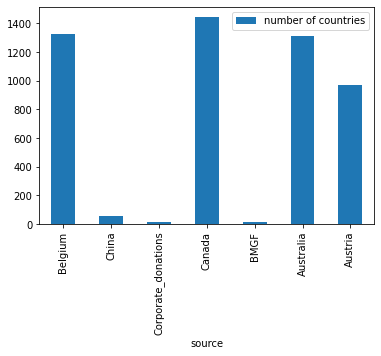

In [25]:
# wyświetlenie wykresu słupkowego na podstawie danych
from matplotlib import pyplot as plt

res = data5\
  .filter(data5.source.rlike('^[ABC]'))\
  .select(['year', 'source', 'dah_20'])\
  .groupBy('source')\
  .agg(
      count('year').alias('number of countries'),
      mean('dah_20').alias('mean dah_20'),
      mean('year').alias('mean year'), 
      max('year').alias('max year'))\
  .toPandas()

res\
  .plot(kind='bar', x='source', y='number of countries')

plt.show()

In [26]:
# zapis danych do plików CSV, JSON i Parquet
data5.select(['year', 'source', 'dah_20']).write.csv(r'/content/csv_res_file.csv')
data5.select(['year', 'source', 'dah_20']).write.save(r'/content/json_res_file.json')
data5.select(['year', 'source', 'dah_20']).write.save(r'/content/parquet_res_file.parquet')